In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.25)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [5]:
data_count, feature_count = train_x.shape
data_count, feature_count

(426, 30)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(feature_count,)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [7]:
h = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100)

print(f"Train score: {model.evaluate(train_x, train_y)}")
print(f"Test score: {model.evaluate(test_x, test_y)}")

Epoch 1/100
14/14 [==============================] - 0s 13ms/step - loss: 0.7161 - accuracy: 0.6056 - val_loss: 0.5458 - val_accuracy: 0.7063
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6245 - accuracy: 0.6479 - val_loss: 0.4844 - val_accuracy: 0.7832
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.6925 - val_loss: 0.4423 - val_accuracy: 0.8392
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.7254 - val_loss: 0.4113 - val_accuracy: 0.8601
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4666 - accuracy: 0.7676 - val_loss: 0.3873 - val_accuracy: 0.8741
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.8028 - val_loss: 0.36

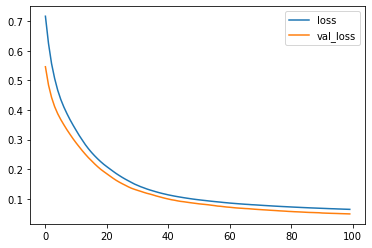

In [8]:
import matplotlib.pyplot as plt

plt.plot(h.history["loss"], label="loss")
plt.plot(h.history["val_loss"], label="val_loss")
plt.legend()

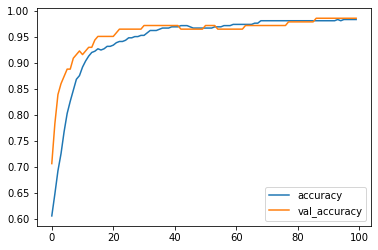

In [9]:
plt.plot(h.history["accuracy"], label="accuracy")
plt.plot(h.history["val_accuracy"], label="val_accuracy")
plt.legend()

## Predictions

In [20]:
pred_y = model.predict(train_x)

In [21]:
import numpy as np
pred_y = pred_y.flatten().round()
pred_y

array([1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1.

In [22]:
print(f"Calculated accuracy: {(pred_y == train_y).mean()}")
print(f"Evaluate: {model.evaluate(train_x, train_y)}")

Calculated accuracy: 0.9835680751173709
14/14 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9836
Evaluate: [0.06449097394943237, 0.9835680723190308]
